/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_13031/1347023949.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(0, inplace=True)


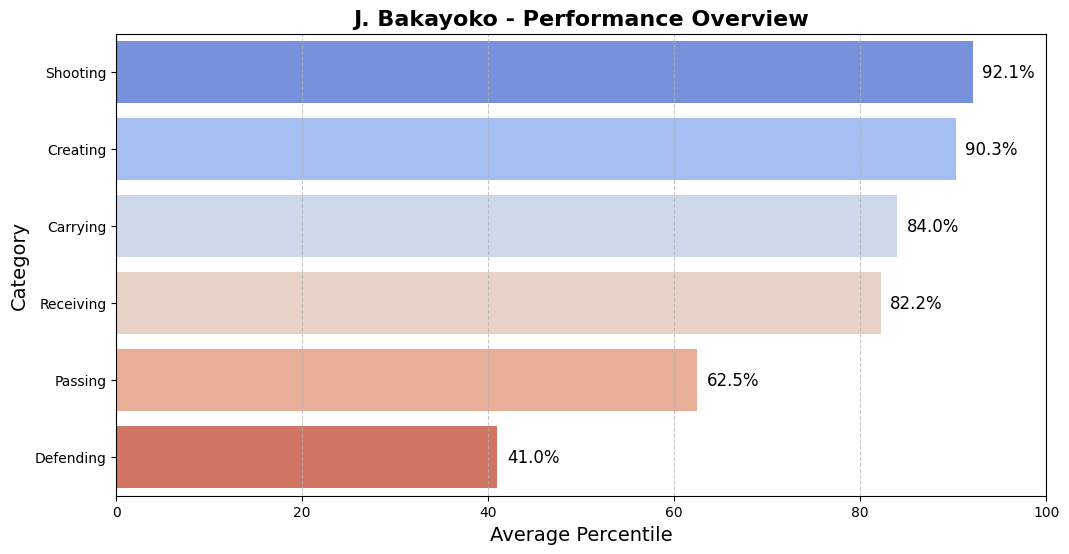

In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the provided Excel file
file_path = "/Users/marclambertes/Downloads/Wyscout/Eredivisie.xlsx"
df = pd.read_excel(file_path)

# Define categories and corresponding metrics
categories = {
    "Shooting": [
        "Goals", "xG", "Non-penalty goals", "Non-penalty goals per 90",
        "Shots", "Shots per 90", "Shots on target, %", "Goal conversion, %"
    ],
    "Creating": [
        "Assists", "xA", "xA per 90", "Shot assists per 90", "Smart passes per 90",
        "Key passes per 90", "Passes to penalty area per 90", "Deep completions per 90",
        "Deep completed crosses per 90"
    ],
    "Receiving": [
        "Touches in box per 90", "Received passes per 90", "Received long passes per 90",
        "Fouls suffered per 90"
    ],
    "Carrying": [
        "Dribbles per 90", "Successful dribbles, %", "Progressive runs per 90", "Accelerations per 90"
    ],
    "Passing": [
        "Passes per 90", "Accurate passes, %", "Progressive passes per 90",
        "Accurate progressive passes, %", "Passes to final third per 90",
        "Accurate passes to final third, %"
    ],
    "Defending": [
        "Successful defensive actions per 90", "Defensive duels per 90", "Defensive duels won, %",
        "Interceptions per 90", "PAdj Interceptions", "Sliding tackles per 90", "Fouls per 90",
        "Aerial duels per 90", "Aerial duels won, %"
    ]
}

# Select the metrics defined in the categories and filter the dataset
selected_metrics = []
for metrics in categories.values():
    selected_metrics.extend(metrics)

# Keep only the selected metrics, the 'Player' column, and drop the rest
columns_to_keep = ['Player'] + [metric for metric in selected_metrics if metric in df.columns]
filtered_df = df[columns_to_keep]

# Handle missing values by filling them with 0
filtered_df.fillna(0, inplace=True)

# Set the player's name for analysis (Replace with actual player name if needed)
player_name = filtered_df['Player'].iloc[0]  # Taking the first player in dataset

# Filter data for the player
player_data = filtered_df[filtered_df['Player'] == player_name].reset_index(drop=True)

# Calculate average percentiles per category
average_percentiles = []
for category_name, metrics in categories.items():
    valid_metrics = [metric for metric in metrics if metric in filtered_df.columns]
    percentile_ranks = [
        math.floor(stats.percentileofscore(filtered_df[metric], player_data[metric].values[0]))
        for metric in valid_metrics
    ]
    percentile_ranks = [99 if rank == 100 else rank for rank in percentile_ranks]  # Handle 100 percentile case
    avg_percentile = round(np.mean(percentile_ranks), 1)
    average_percentiles.append((category_name, avg_percentile))

# Convert to DataFrame for plotting
avg_percentile_df = pd.DataFrame(average_percentiles, columns=["Category", "Average Percentile"])
avg_percentile_df = avg_percentile_df.sort_values(by="Average Percentile", ascending=False)

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_percentile_df,
    x="Average Percentile",
    y="Category",
    palette="coolwarm"
)

# Add title and labels
plt.xlabel("Average Percentile", fontsize=14)
plt.ylabel("Category", fontsize=14)
plt.title(f"{player_name} - Performance Overview", fontsize=16, fontweight="bold")

# Display values on the bars
for index, value in enumerate(avg_percentile_df["Average Percentile"]):
    plt.text(value + 1, index, f"{value}%", va="center", fontsize=12)

# Show plot
plt.xlim(0, 100)  # Percentiles range from 0 to 100
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()
